In [2]:
pwd

'C:\\Users\\rajag\\Desktop\\wobblrr\\crime uk'

In [3]:
import pandas as pd # for data wrangling
import numpy as np # for algebric calculations 
import seaborn as sns # for plotting 
import matplotlib.pyplot as plt # for plotting
import plotly.express as px # for plotting
import datetime # for working with datetime data

%matplotlib inline 

In [4]:
# Stop & search data of feb, march and april 2020 has been considered to account for pre lockdown, during lockdown and post lockdown
df_02_stop_and_search = pd.read_csv("2020-02-city-of-london-stop-and-search.csv")
df_03_stop_and_search = pd.read_csv("2020-03-city-of-london-stop-and-search.csv")
df_04_stop_and_search = pd.read_csv("2020-04-city-of-london-stop-and-search.csv")

In [5]:
# data preprocessing
df = pd.concat([df_02_stop_and_search,df_03_stop_and_search,df_04_stop_and_search])
df = df.drop(['Part of a policing operation','Policing operation','Latitude','Longitude'], axis=1)
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['month'] = pd.DatetimeIndex(df['Date']).month

In [6]:
# a look at how the final pre-processed data looks like
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 557 entries, 0 to 149
Data columns (total 12 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Type                                      557 non-null    object
 1   Date                                      557 non-null    object
 2   Gender                                    556 non-null    object
 3   Age range                                 533 non-null    object
 4   Self-defined ethnicity                    534 non-null    object
 5   Officer-defined ethnicity                 533 non-null    object
 6   Legislation                               557 non-null    object
 7   Object of search                          552 non-null    object
 8   Outcome                                   557 non-null    object
 9   Outcome linked to object of search        557 non-null    bool  
 10  Removal of more than just outer clothing  557 non-

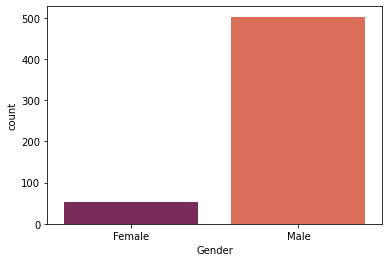

In [7]:
# number of stop and search of men and women
ax = sns.countplot(data=df, x='Gender', palette='rocket')
plt.show()

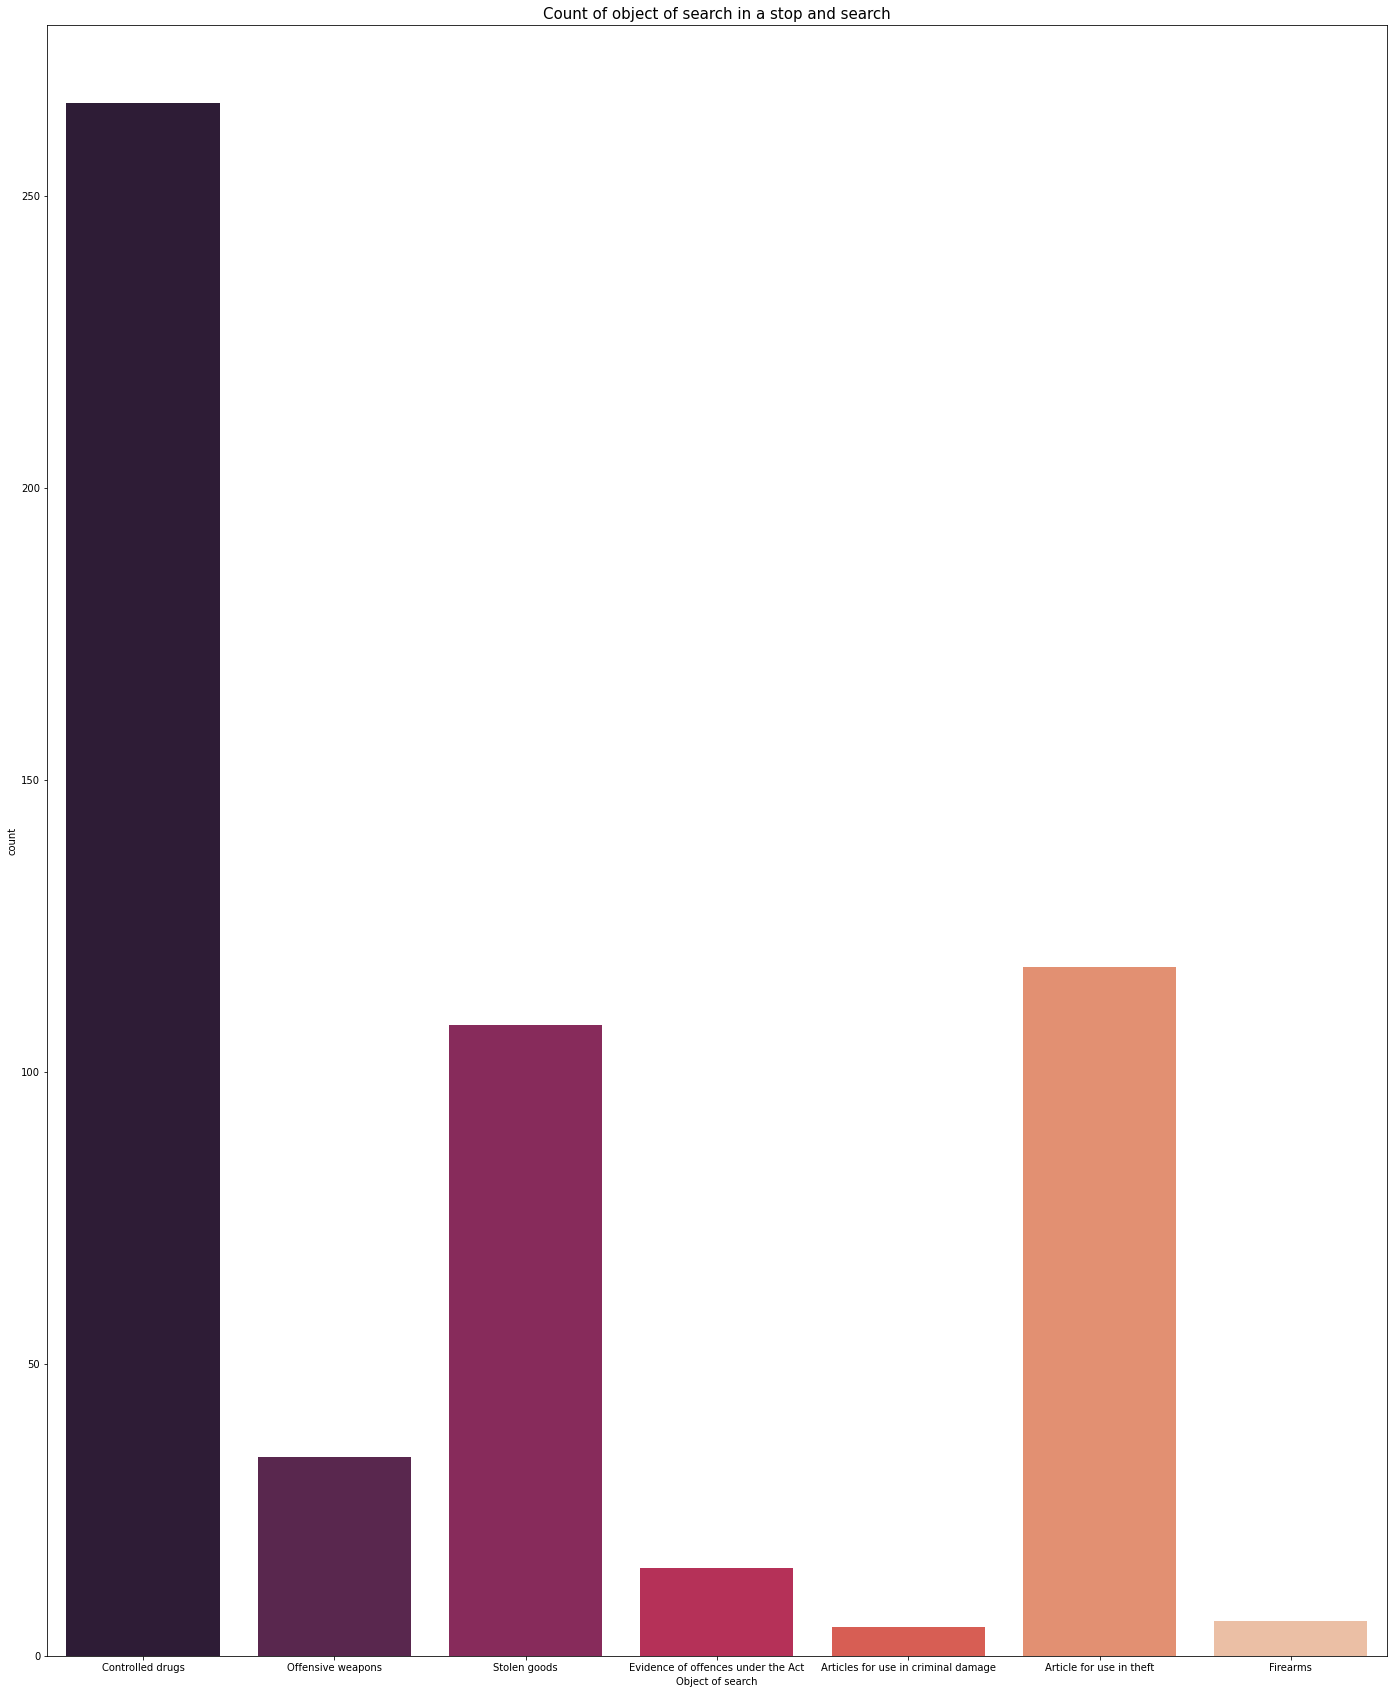

In [8]:
# most searched for object in a stop and search
plt.figure(figsize=(24,30))
ax = sns.countplot(data=df, x='Object of search', palette='rocket')
plt.title('Count of object of search in a stop and search', fontsize=15)
plt.show()

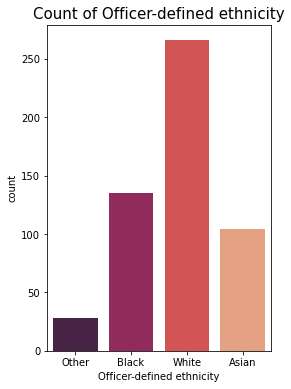

In [9]:
# Ethnicity of the people in a stop and search
plt.figure(figsize=(4,6))
ax = sns.countplot(data=df, x='Officer-defined ethnicity', palette='rocket')
plt.title('Count of Officer-defined ethnicity', fontsize=15)
plt.show()

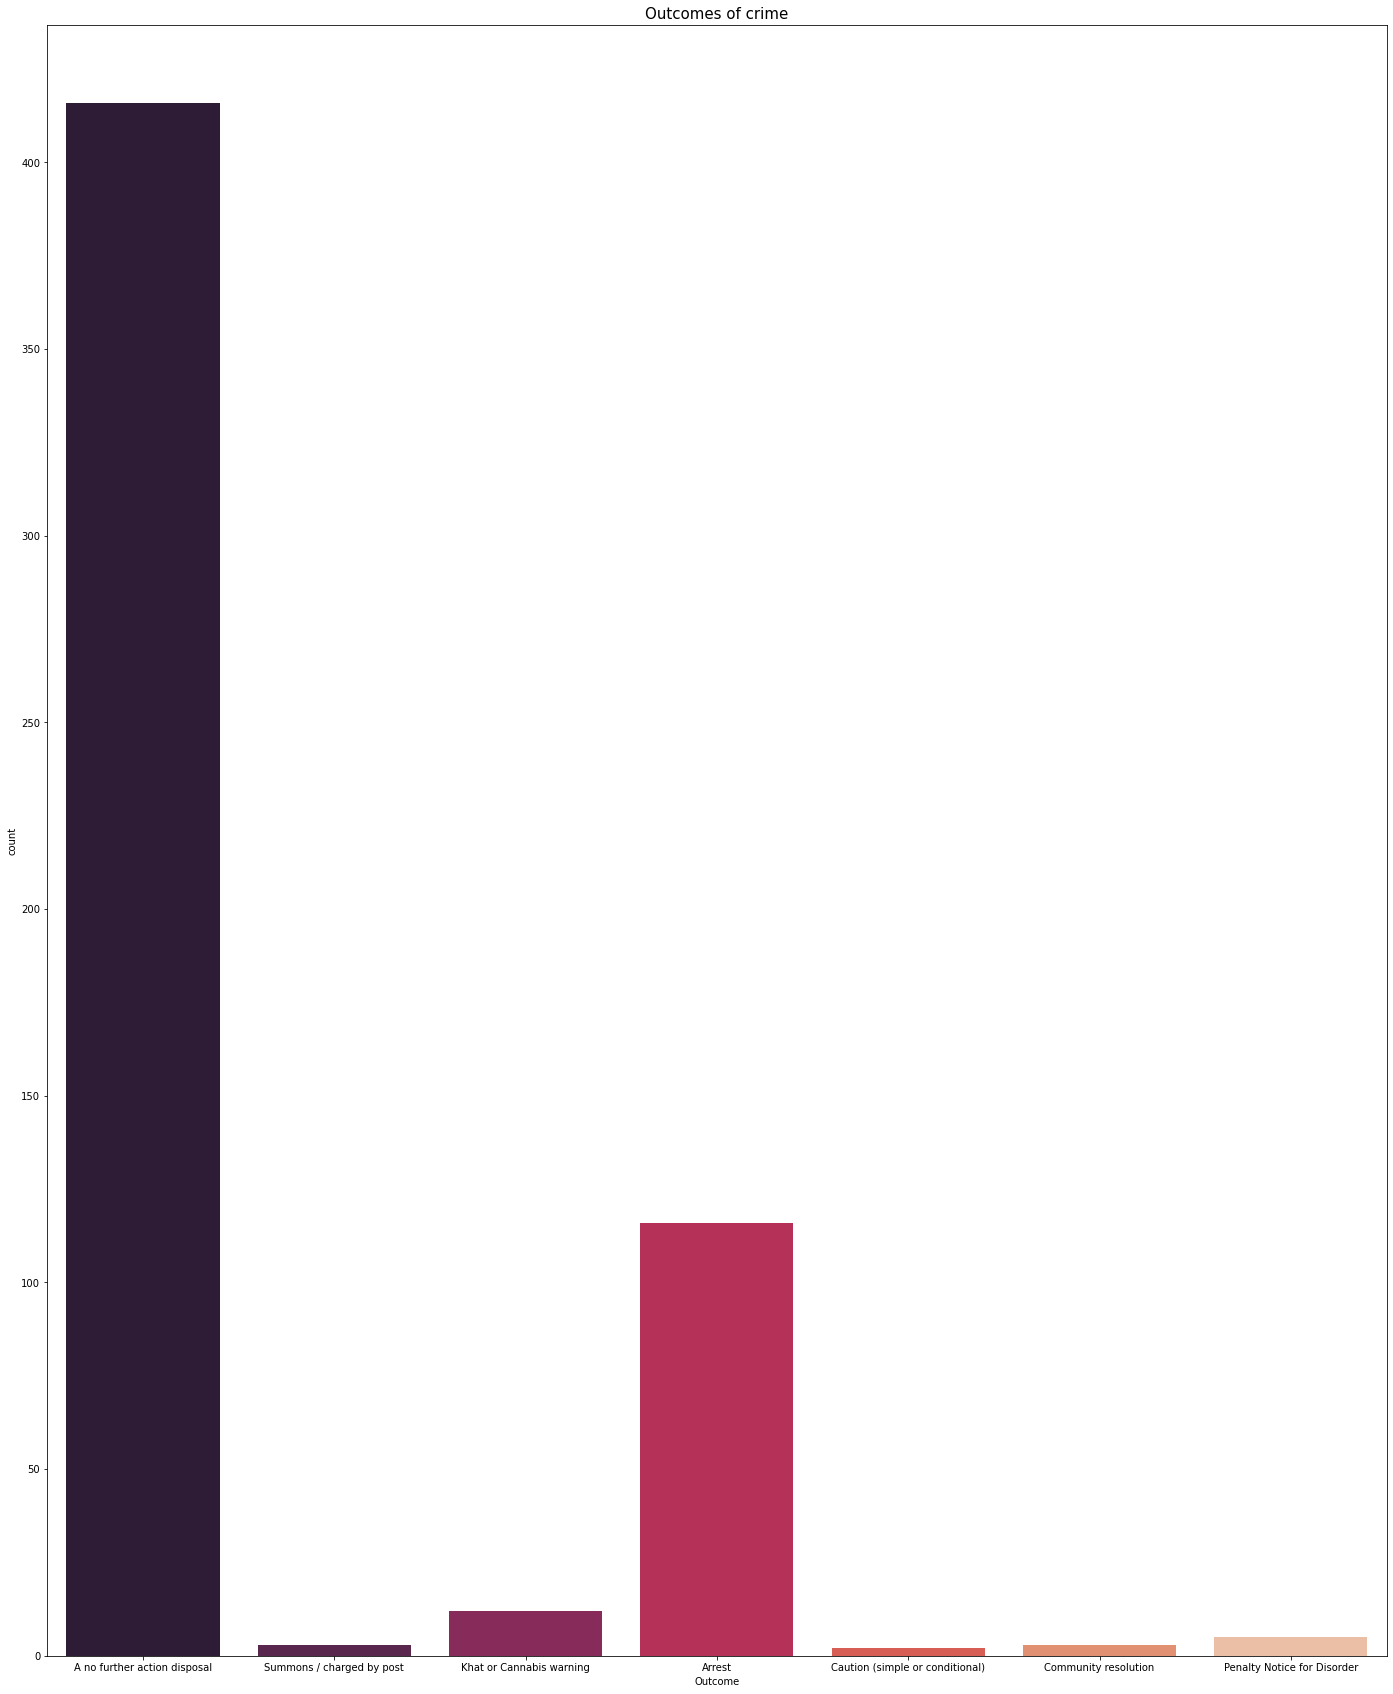

In [10]:
# Outcomes of most of the crimes
plt.figure(figsize=(24,30))
ax = sns.countplot(data=df, x='Outcome', palette='rocket')
plt.title('Outcomes of crime', fontsize=15)
plt.show()

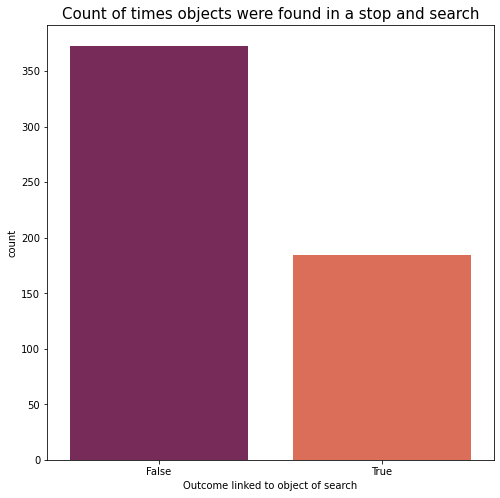

In [11]:
# number of times an object was found in a stop and search
plt.figure(figsize=(8,8))
ax = sns.countplot(data=df, x='Outcome linked to object of search', palette='rocket')
plt.title('Count of times objects were found in a stop and search', fontsize=15)
plt.show()

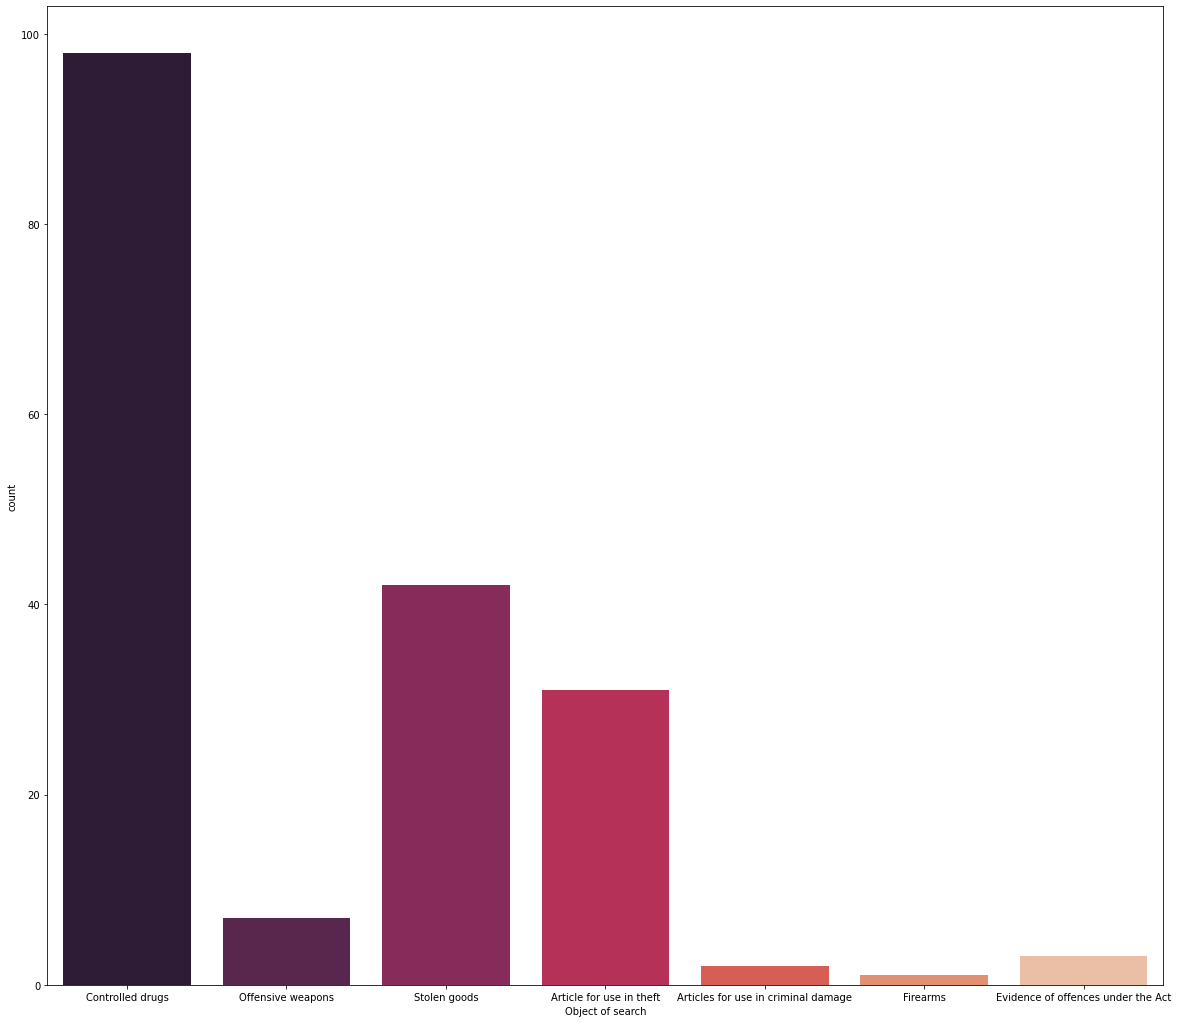

In [25]:
# most found objects in a stop and search whose outcome linked to object of search is true
df_new = df[df['Outcome linked to object of search'] == True]

plt.figure(figsize=(20,18))
ax = sns.countplot(data=df_new, x='Object of search', palette='rocket')
plt.title('Count of objects found', fontsize=15)
plt.show()

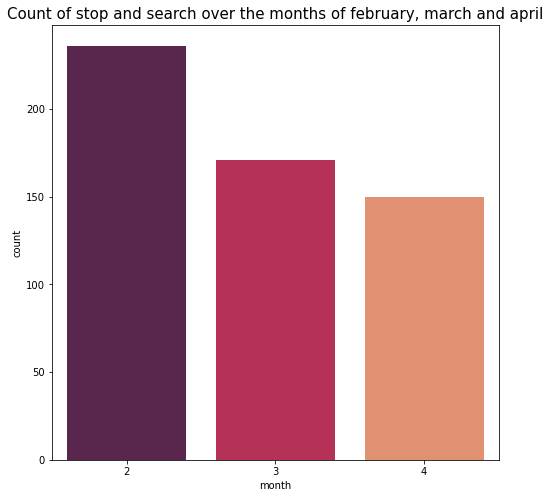

In [12]:
# stop and searches over the months
plt.figure(figsize=(8,8))
ax = sns.countplot(data=df, x='month', palette='rocket')
plt.title('Count of stop and search over the months of february, march and april', fontsize=15)
plt.show()

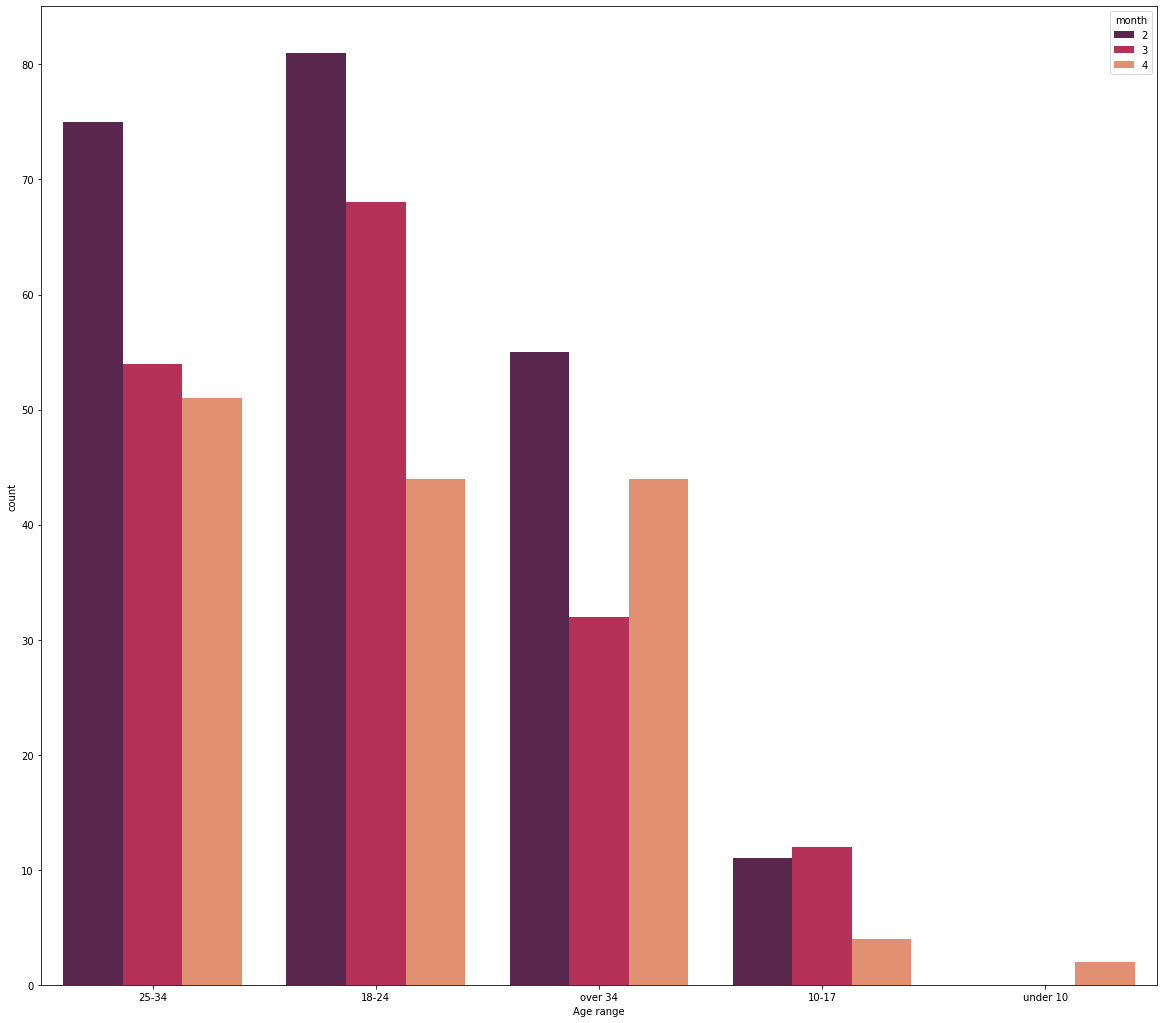

In [13]:
# Age range in a count and search 
plt.figure(figsize=(20,18))
ax = sns.countplot(data=df, x='Age range',hue='month', palette='rocket')
plt.title('Count of age ranges', fontsize=15)
plt.show()